## Loan prediction 

## importing Libraries

In [2]:

import numpy as np # Importing the NumPy library for numerical operations

import pandas as pd ## Importing the pandas library for data manipulation and analysis

import matplotlib.pyplot as plt ## Importing the matplotlib library for plotting and visualization

import seaborn as sns ## Importing the seaborn library for statistical data visualization

%matplotlib inline 
# Enabling the inline backend for Jupyter notebooks to display plots within the notebook


## Loading the dataset

In [3]:
## Reading the CSV file 'loan-train.csv' into a DataFrame named 'df'
df=pd.read_csv('loan-train.csv')
## Displaying the first five rows of the DataFrame 'df'
df.head() 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
 ## Displaying the dimensions of the DataFrame 'df' as a tuple (number of rows, number of columns)
df.shape

(614, 13)

In [5]:
df.describe() # Displaying summary statistics for numerical columns of the DataFrame 'df'

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info() # Displaying a concise summary of the DataFrame 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()  # Calculating the number of missing (null) values in each column of the DataFrame 'df'

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())  
 ## Filling missing values in the 'LoanAmount' column with the mean value of the column

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])  
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
##  check the final Dataset Shape
df.shape

(614, 13)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Exploratory Data Analyis

## Comparison between Parameters in getting the Loan:

<Axes: xlabel='Property_Area', ylabel='count'>

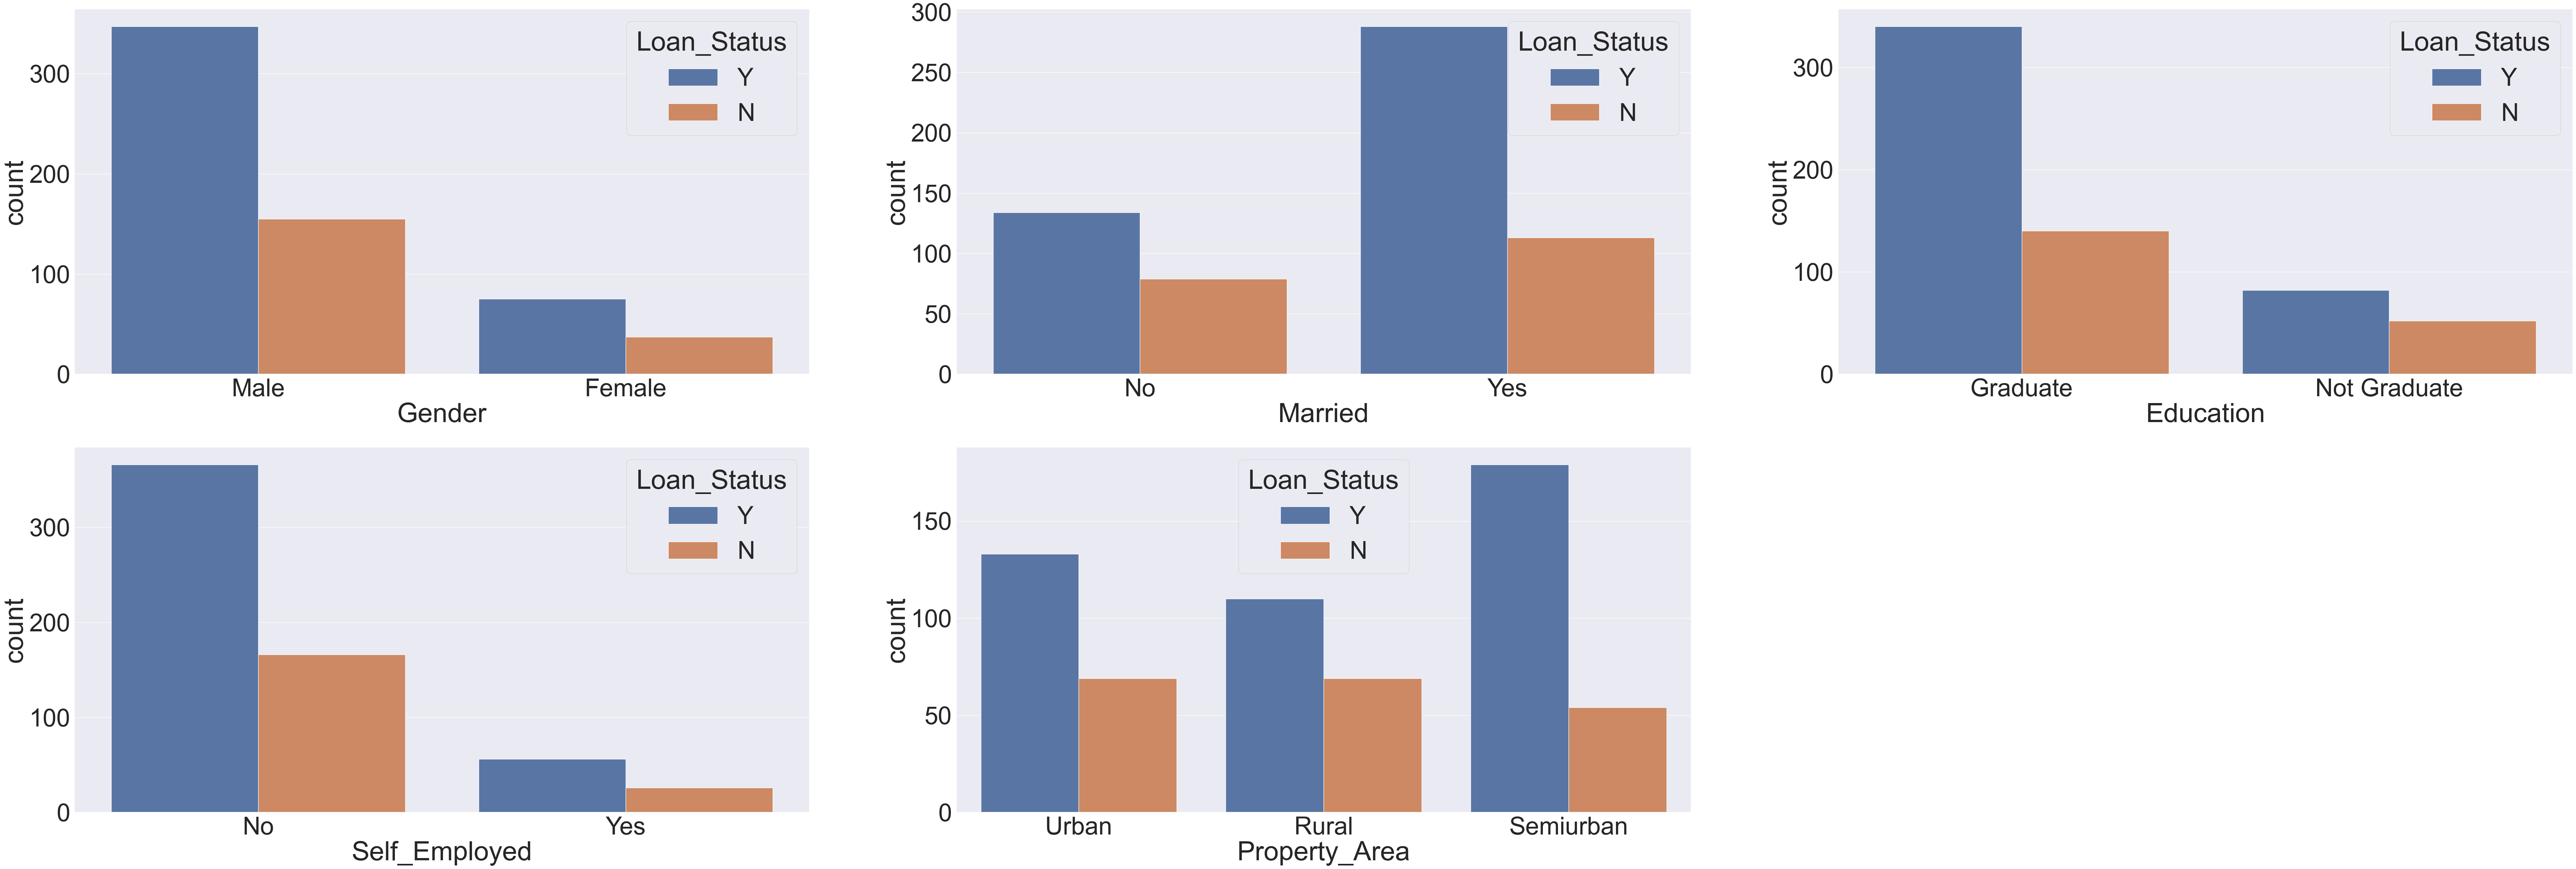

In [13]:
import matplotlib.pyplot as plt # Importing the matplotlib library for plotting and visualization
import seaborn as sns # Importing the seaborn library for statistical data visualization

# Creating a new figure with a specified size (100 inches by 50 inches)
plt.figure(figsize=(100, 50))

# Setting the font scale for seaborn plots to 5 (making the font size larger)
sns.set(font_scale=5)

# Creating a subplot in a 3x3 grid at position 1 (top-left)
plt.subplot(331)
# Plotting a count plot of 'Gender' with the hue based on 'Loan_Status'
sns.countplot(x='Gender', data=df, hue=df['Loan_Status'])

# Creating a subplot in a 3x3 grid at position 2 (top-middle)
plt.subplot(332)
# Plotting a count plot of 'Married' with the hue based on 'Loan_Status'
sns.countplot(x='Married', data=df, hue=df['Loan_Status'])

# Creating a subplot in a 3x3 grid at position 3 (top-right)
plt.subplot(333)
# Plotting a count plot of 'Education' with the hue based on 'Loan_Status'
sns.countplot(x='Education', data=df, hue=df['Loan_Status'])

# Creating a subplot in a 3x3 grid at position 4 (middle-left)
plt.subplot(334)
# Plotting a count plot of 'Self_Employed' with the hue based on 'Loan_Status'
sns.countplot(x='Self_Employed', data=df, hue=df['Loan_Status'])

# Creating a subplot in a 3x3 grid at position 5 (middle-middle)
plt.subplot(335)
# Plotting a count plot of 'Property_Area' with the hue based on 'Loan_Status'
sns.countplot(x='Property_Area', data=df, hue=df['Loan_Status'])


In [14]:
# Replacing 'Y' with 1 in the 'Loan_Status' column to convert loan approval status to numeric
df['Loan_Status'].replace('Y', 1, inplace=True)

# Replacing 'N' with 0 in the 'Loan_Status' column to convert loan disapproval status to numeric
df['Loan_Status'].replace('N', 0, inplace=True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_35596\2447739744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Status'].replace('Y', 1, inplace=True)
C:\Users\prasa\AppData\Local\Temp\ipykernel_35596\2447739744.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [15]:
df['Loan_Status'].value_counts()  ## Counting the occurrences of each unique value in the 'Loan_Status' column

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [16]:
# Mapping the 'Gender' column values to numerical values: 'Male' to 1 and 'Female' to 0
df.Gender.map({'Male': 1, 'Female': 0})
# Counting the occurrences of each unique value in the 'Gender' column
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [17]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

Married
1    401
0    213
Name: count, dtype: int64

In [18]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [19]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()


Education
1    480
0    134
Name: count, dtype: int64

In [20]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    532
1     82
Name: count, dtype: int64

In [21]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

In [22]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64

In [23]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
df['Credit_History'].value_counts()

Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64

## FINAL DATA

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,Male,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,Male,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [26]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender'] = df['Gender'].fillna(-1)  # or use mode/mean



## classification algorithem

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
X = df.iloc[1:542,1:12].values # spliting train-test data 
y = df.iloc[1:542,12].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [30]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.803680981595092


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
lrt=model.score(X_train,y_train)

In [32]:
lrp=metrics.accuracy_score(lr_prediction,y_test)

In [33]:
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
y_test [1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0]


In [34]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [35]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

def randomized_search(params, runs=10,clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model





In [36]:
modelrds=RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42),param_distributions={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':[ 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         })

In [37]:
modelrds.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 2, 4, 6, 8, 10, 20],
                                        'max_features': [0.8, 0.7, 0.6, 0.5,
                                                         0.4],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.05, 0.1,
                                                                  0.15, 0.2],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             20, 30]})

In [38]:
modelrds.best_params_

{'min_samples_leaf': 20,
 'min_impurity_decrease': 0.05,
 'max_features': 0.8,
 'max_depth': 20}

In [39]:
final=RandomForestClassifier(n_jobs=-1, random_state=42,min_samples_leaf= 8,
 min_impurity_decrease= 0.05,
 max_features= 0.8,
 max_depth= 8)

In [40]:
final.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.8,
                       min_impurity_decrease=0.05, min_samples_leaf=8,
                       n_jobs=-1, random_state=42)

In [41]:
frf=final.score(X_train,y_train)

In [42]:
y_predrf=final.predict(X_test)

In [43]:
rfp=accuracy_score(y_test,y_predrf)

In [44]:
import pandas as pd

# Assuming lrt, frf, lrp, and rfp are the scores of your models
# lrt and frf are model scores
# lrp and rfp are test scores

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'model_score': [lrt, frf],
    'test_score': [lrp, rfp]
}, index=['LR', 'RFC'])

# Display the DataFrame
print(comparison_df)


     model_score  test_score
LR      0.798942    0.803681
RFC     0.798942    0.815951


In [45]:
pip install joblib streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
import joblib
joblib.dump(model,'Loan_predict.pkl')
print('Module saved successfully.')

Module saved successfully.


In [47]:
df.shape

(614, 13)